In [41]:
import pandas as pd

# Navigate up one directory to find the CSV file
csv_path_apr = '../csv/Author_df_apr.csv'

# Read the CSV file into a DataFrame
df_author_apr = pd.read_csv(csv_path_apr)

# Filter the DataFrame based on multiple conditions: 'authorVideoCount' and 'duetSetting'
filtered_df_apr = df_author_apr[(df_author_apr['authorVideoCount'] >= 10) & (df_author_apr['duetSetting'] == 0)]

# Create a list of 'authorId' from the filtered DataFrame
author_id_list_apr = filtered_df_apr['authorId'].tolist()

# Display the list or do further processing
print(len(author_id_list_apr))

2648


In [42]:
# Read January scv to DataFrame
csv_path_jan = '../csv/Author_df_jan.csv'

# Read the CSV file into a DataFrame
df_author_jan = pd.read_csv(csv_path_jan)

# Filter the DataFrame based on multiple conditions: 'authorVideoCount' and 'duetSetting'
filtered_df_jan = df_author_jan[(df_author_jan['authorVideoCount'] >= 10) & (df_author_jan['duetSetting'] == 0)]

# Create a list of 'authorId' from the filtered DataFrame
author_id_list_jan = filtered_df_jan['authorId'].tolist()

# Display the list or do further processing
print(len(author_id_list_jan))

2222


In [46]:
#Read Duets scv to DataFrame
csv_path_duet = '../csv/Duets.csv'

# Read the CSV file into a DataFrame
df_duets = pd.read_csv(csv_path_duet)
print(df_duets)

                                       duetVideoLink          duetVideoId  \
0  https://www.tiktok.com/@6791320529312941061/vi...  6947023689737112837   
1  https://www.tiktok.com/@6950030771592709125/vi...  7119986038134656257   
2  https://www.tiktok.com/@6895380185618940929/vi...  7079535815201787142   
3  https://www.tiktok.com/@7055043945923822598/vi...  7172294040971463942   
4  https://www.tiktok.com/@7014977461462041606/vi...  7091837811468406059   
5  https://www.tiktok.com/@christabellatravels/vi...  6825424519843335429   
6  https://www.tiktok.com/@6763491224218420230/vi...  7101315402956918022   
7  https://www.tiktok.com/@6938912195011249157/vi...  7099060568274767109   
8  https://www.tiktok.com/@6743418378922607621/vi...  6916730184490028294   
9  https://www.tiktok.com/@6866418501851579398/vi...  6906533896897203461   

          duetAuthorId             duetUniqueId  originalUniqueId  \
0  6791320529312941061           jenonajetplane    abigailmartiin   
1  69500307715

In [47]:
#Building Reach metric, combine 'FollowerCount', 'HeartCount', and 'VideoCount' 

df_author_apr['Reach'] = df_author_apr['authorFollowerCount'] + df_author_apr['authorHeartCount'] + df_author_apr['authorVideoCount']

df_author_jan['Reach'] = df_author_jan['authorFollowerCount'] + df_author_jan['authorHeartCount'] + df_author_jan['authorVideoCount']

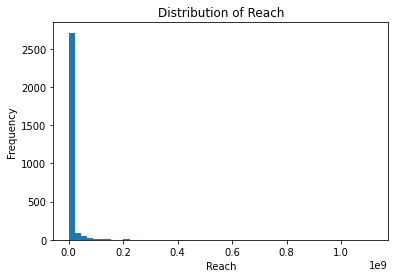

In [45]:
#Examining the distribution of Reach

import matplotlib.pyplot as plt

plt.hist(df_author_apr['Reach'], bins=50)
plt.xlabel('Reach')
plt.ylabel('Frequency')
plt.title('Distribution of Reach')
plt.show()


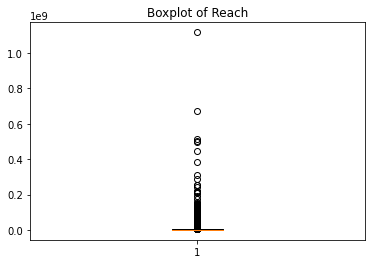

In [10]:
plt.boxplot(df_author_apr['Reach'])
plt.title('Boxplot of Reach')
plt.show()


In [51]:
#Create Tiers for Jan and Apr datasets

df_author_apr['Tier_apr'] = pd.qcut(df_author_apr['Reach'], q=3, labels=['Low', 'Medium', 'High'])

df_author_jan['Tier_jan'] = pd.qcut(df_author_jan['Reach'], q=3, labels=['Low', 'Medium', 'High'])

In [52]:
print(df_author_apr['Tier_apr'].value_counts())
print(df_author_jan['Tier_jan'].value_counts())

Low       973
Medium    973
High      973
Name: Tier_apr, dtype: int64
Low       817
High      817
Medium    816
Name: Tier_jan, dtype: int64


In [54]:
#Enrich Duet DataFrame with Tier in Jan and Apr

df_author_apr_tier = df_author_apr[['authorId', 'Tier_apr']]
df_author_jan_tier = df_author_jan[['authorId', 'Tier_jan']]


In [55]:
# Merge with df_author_apr to get Tier_Apr
df_duets = df_duets.merge(df_author_apr_tier, left_on='duetAuthorId', right_on='authorId', how='left')

# Merge with df_author_jan to get Tier_Jan
df_duets = df_duets.merge(df_author_jan_tier, left_on='duetAuthorId', right_on='authorId', how='left', suffixes=('_apr', '_jan'))

# Drop the extra 'authorId' columns if needed
df_duets.drop(['authorId_apr', 'authorId_jan'], axis=1, inplace=True)


In [56]:
df_duets


,duetVideoLink,duetVideoId,duetAuthorId,duetUniqueId,originalUniqueId,originalVideoLink,originalVideoId,Tier_apr,Tier_jan
0,https://www.tiktok.com/@6791320529312941061/vi...,6947023689737112837,6791320529312941061,jenonajetplane,abigailmartiin,https://www.tiktok.com/@abigailmartiin/video/6...,6936961003221470470,High,High
1,https://www.tiktok.com/@6950030771592709125/vi...,7119986038134656257,6950030771592709125,freelancewithsara,lorallangemeier,https://www.tiktok.com/@lorallangemeier/video/...,7119236932516810030,Low,Medium
2,https://www.tiktok.com/@6895380185618940929/vi...,7079535815201787142,6895380185618940929,nomad.abroad,dynamitejobs,https://www.tiktok.com/@dynamitejobs/video/707...,7078785144257006894,High,High
3,https://www.tiktok.com/@7055043945923822598/vi...,7172294040971463942,7055043945923822598,theremotejob.co,tiktoktarlton,https://www.tiktok.com/@tiktoktarlton/video/71...,7164809463168290090,Low,Medium
4,https://www.tiktok.com/@7014977461462041606/vi...,7091837811468406059,7014977461462041606,legacy_wealth_crusade,jvrmarketing,https://www.tiktok.com/@jvrmarketing/video/709...,7091684758610201902,Medium,Medium
5,https://www.tiktok.com/@christabellatravels/vi...,6825424519843335429,6703793114487948293,christabellatravels,nikkibartol,https://www.tiktok.com/@nikkibartol/video/6821...,6821538705640082694,Medium,Medium
6,https://www.tiktok.com/@6763491224218420230/vi...,7101315402956918022,6763491224218420230,journeyintheworld,christian.grossi,https://www.tiktok.com/@christian.grossi/video...,7099555033972493614,Low,Medium
7,https://www.tiktok.com/@6938912195011249157/vi...,7099060568274767109,6938912195011249157,yourmarketingmentoranna,msnbc,https://www.tiktok.com/@msnbc/video/7096909768...,7096909768098434350,Low,Low
8,https://www.tiktok.com/@6743418378922607621/vi...,6916730184490028294,6743418378922607621,diamondthedj,belindaskou,https://www.tiktok.com/@belindaskou/video/6901...,6901137754369920261,Medium,Medium
9,https://www.tiktok.com/@6866418501851579398/vi...,6906533896897203461,6866418501851579398,madelynmon0,nikkifoxx,https://www.tiktok.com/@nikkifoxx/video/690431...,6904310243098938629,High,NaN


In [37]:
#Duet creators and their signatures in the datasets

# Example list of 10 authorId that engaged in duets
duet_author_ids = [6791320529312941061,
6950030771592709125,
6895380185618940929,
7055043945923822598,
7014977461462041606,
6703793114487948293,
6763491224218420230,
6938912195011249157,
6743418378922607621,
6866418501851579398] 

# Extract signatures from the DataFrame
duet_authors_df = df_author_apr.loc[df_author_apr['authorId'].isin(duet_author_ids)]

# Extract only the 'authorId' and 'signature' columns
duet_authors_signatures = duet_authors_df[['authorId', 'signature','authorUniqueId']]

# Loop through each row in the DataFrame and print authorId and signature
for index, row in duet_authors_signatures.iterrows():
    print(f"Author ID: {row['authorId']}")
    print(f"Signature: {row['signature']}")
    print (f"Nickname:{row['authorUniqueId']}") 
    print("-" * 50)  # separator


Author ID: 6895380185618940929
Signature: Immigrant 🌏 Idiot 🎩
& author of The Spanish Nerd
Nickname:nomad.abroad
--------------------------------------------------
Author ID: 6703793114487948293
Signature: I show people how to travel the🌎while making 💸 doing work they ❤️! Sign up👇🏻
Nickname:christabellatravels
--------------------------------------------------
Author ID: 6950030771592709125
Signature: This is a dream that I have had since lunch
Nickname:saraaawatson
--------------------------------------------------
Author ID: 6791320529312941061
Signature: Solo traveler ✈️
Award-winning author ✍️
Change your own life through travel 🌍
Nickname:jenonajetplane
--------------------------------------------------
Author ID: 6763491224218420230
Signature: On a journey of wild explorations while travel is my business and life duty.
Nickname:journeyintheworld
--------------------------------------------------
Author ID: 7055043945923822598
Signature: Whether you’re looking for a remote job, a 

In [25]:
# Suppose df_author is your DataFrame containing author details

# Replace 'desired_nickname' with the nickname you're looking for
desired_nickname = 'madelynmon0'

filtered_row = df_author_apr[df_author_apr['authorUniqueId'] == desired_nickname]

# Extract the 'authorId'
author_id = filtered_row['authorId'].values[0]  # This will give you the first authorId if there are multiple matches

print(f"The authorId for nickname {desired_nickname} is {author_id}")


The authorId for nickname madelynmon0 is 6866418501851579398


In [30]:
desired_nickname = 'jenonajetplane'

filtered_row = df_author_jan[df_author_jan['authorUniqueId'] == desired_nickname]

# Extract the 'authorId'
author_id = filtered_row['authorId'].values[0]  # This will give you the first authorId if there are multiple matches

print(f"The authorId for nickname {desired_nickname} is {author_id}")


The authorId for nickname jenonajetplane is 6791320529312941061
